In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('ppi.csv')

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0  domain  aa_ProtPosition  uniprot_id  Rlength sequence  \
0           0       0                1  A0A024RAV5      188        M   
1           1       0                2  A0A024RAV5      188        T   
2           2       0                3  A0A024RAV5      188        E   
3           3       0                4  A0A024RAV5      188        Y   
4           4       1                5  A0A024RAV5      188        K   

   normalized_length  normalized_abs_surf_acc  normalized_hydropathy_index  \
0           0.238095                 0.784319                     0.711111   
1           0.238095                 0.359207                     0.422222   
2           0.238095                 0.395387                     0.111111   
3           0.238095                 0.401655                     0.355556   
4           0.238095                 0.288103                     0.066667   

   rel_surf_acc  ...  9_wm_pssm_K  9_wm_pssm_M  9_wm_pssm_F  9_wm_pssm_P  \
0         0.803  ...  

In [5]:
cols_to_remove = ["Unnamed: 0", "domain", "aa_ProtPosition", "uniprot_id", "sequence", "Rlength"]
df_clean = df.drop(columns=cols_to_remove)
print(df_clean.head())


   normalized_length  normalized_abs_surf_acc  normalized_hydropathy_index  \
0           0.238095                 0.784319                     0.711111   
1           0.238095                 0.359207                     0.422222   
2           0.238095                 0.395387                     0.111111   
3           0.238095                 0.401655                     0.355556   
4           0.238095                 0.288103                     0.066667   

   rel_surf_acc  prob_sheet  prob_helix  prob_coil   pssm_A   pssm_R   pssm_N  \
0         0.803       0.003       0.003      0.994  0.01799  0.00669  0.00247   
1         0.530       0.047       0.018      0.935  0.11920  0.99331  0.50000   
2         0.464       0.043       0.053      0.903  0.04743  0.04743  0.50000   
3         0.385       0.084       0.052      0.864  0.00669  0.88080  0.00669   
4         0.287       0.084       0.052      0.864  0.00669  0.88080  0.26894   

   ...  9_wm_pssm_K  9_wm_pssm_M  9_wm_pssm_

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Assume 'p_interface' is the target variable, and all others are features
target = "p_interface"
X = df_clean.drop(columns=[target])
y = df_clean[target]

# Identify numerical features (all remaining columns should be numeric)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Build a preprocessing pipeline
num_pipeline = Pipeline([
    # If missing values exist, you could add an imputer here:
    # ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features)
])

# Fit and transform the features
X_scaled = preprocessor.fit_transform(X)

# Optionally, convert back to a DataFrame for inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)
print(X_scaled_df.head())


   normalized_length  normalized_abs_surf_acc  normalized_hydropathy_index  \
0          -1.146461                 7.023879                     0.736706   
1          -1.146461                 2.255753                    -0.120886   
2          -1.146461                 2.661548                    -1.044446   
3          -1.146461                 2.731854                    -0.318791   
4          -1.146461                 1.458236                    -1.176383   

   rel_surf_acc  prob_sheet  prob_helix  prob_coil    pssm_A    pssm_R  \
0      5.409329   -1.028241   -1.033003   1.627307 -1.261075 -1.048526   
1      2.932627   -0.534644   -0.948817   1.279258 -0.921533  1.915163   
2      2.333864   -0.579516   -0.752384   1.090486 -1.162309 -0.926148   
3      1.617163   -0.119573   -0.757996   0.860420 -1.298984  1.577196   
4      0.728091   -0.119573   -0.757996   0.860420 -1.298984  1.577196   

     pssm_N  ...  9_wm_pssm_L  9_wm_pssm_K  9_wm_pssm_M  9_wm_pssm_F  \
0 -1.086188  .

In [4]:
pip install umap-learn

  Obtaining dependency information for umap-learn from https://files.pythonhosted.org/packages/3c/8f/671c0e1f2572ba625cbcc1faeba9435e00330c3d6962858711445cf1e817/umap_learn-0.5.7-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.51.2 from https://files.pythonhosted.org/packages/63/8f/f983a7c859ccad73d3cc3f86fbba94f16e137cd1ee464631d61b624363b2/numba-0.61.0-cp311-cp311-macosx_10_14_x86_64.whl.metadata
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/d2/53/d23a97e0a2c690d40b165d1062e2c4ccc796be458a1ce59f6ba030434663/pynndescent-0.5.13-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqdm-4.67.1-py3-none-any.whl.metadata
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Obtaining dependency information for llvmlite<0.45,>=0.44.0dev0 from https://files.pythonhosted.org/pa

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

Number of PCA components: 32
Total explained variance ratio: 90.19%


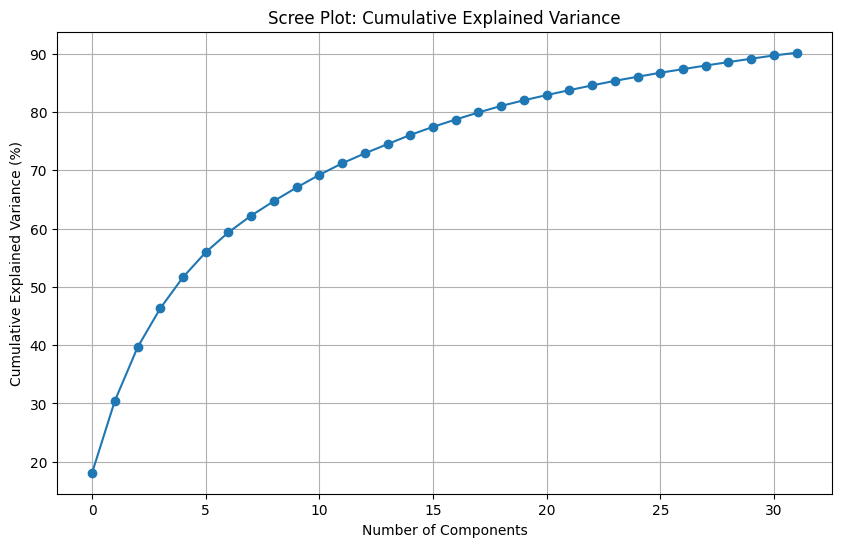

PCA Loadings (each row is a principal component):
[[-0.02427813  0.01544661  0.07876597 ... -0.0250704  -0.03138739
   0.05939771]
 [ 0.04147811 -0.04543192  0.06534906 ...  0.13496946  0.15071339
   0.14595645]
 [-0.00947714 -0.06418888  0.00557604 ...  0.03888029  0.0343792
   0.02011173]
 ...
 [ 0.18164618 -0.04349149  0.00201127 ... -0.04056169  0.09924867
  -0.0419321 ]
 [-0.17296354 -0.01570225  0.02063591 ... -0.00601476  0.04080036
   0.10022923]
 [-0.01614292  0.1353644  -0.02298038 ...  0.00072888  0.00935364
   0.04286708]]


In [8]:
# Apply PCA to retain 90% of the variance
pca = PCA(n_components=0.90, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Print the number of components and the total explained variance ratio
print("Number of PCA components:", pca.n_components_)
print("Total explained variance ratio: {:.2f}%".format(np.sum(pca.explained_variance_ratio_)*100))

# Plot the cumulative explained variance (scree plot)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Scree Plot: Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Display PCA loadings (each row represents a principal component)
loadings = pca.components_
print("PCA Loadings (each row is a principal component):")
print(loadings)

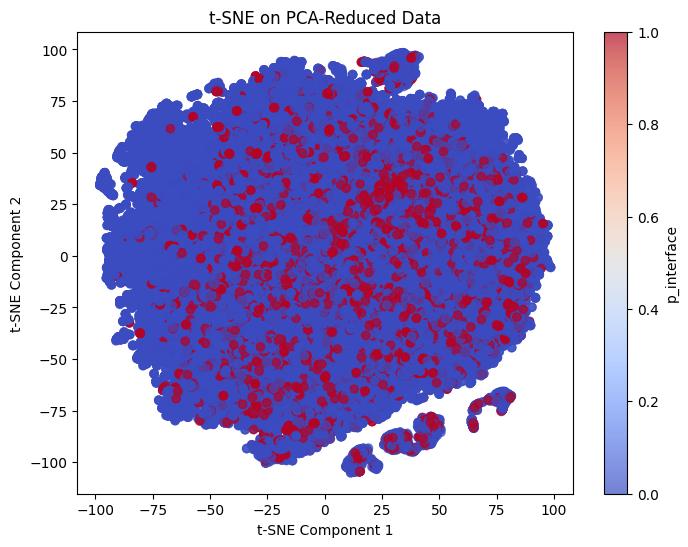

In [9]:
# 1. t-SNE on PCA Data
# Adjust parameters like perplexity (5-50) and n_iter as needed
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
# Color by y (p_interface), assuming it's 0 or 1
scatter_tsne = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter_tsne, label='p_interface')
plt.title("t-SNE on PCA-Reduced Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


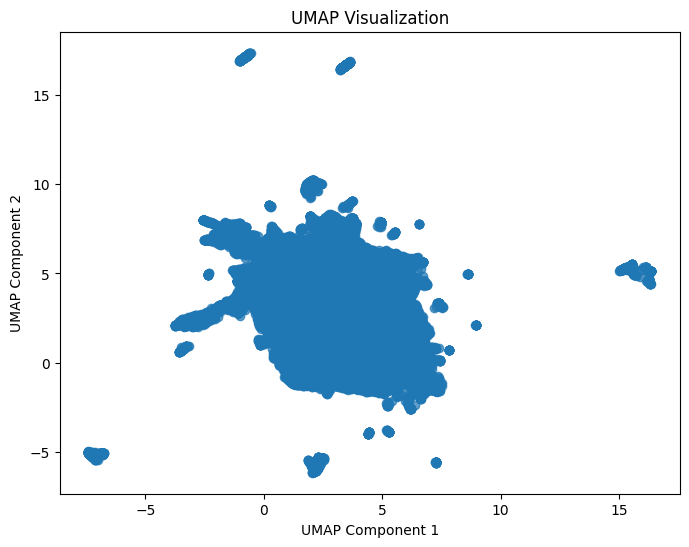

In [18]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_reducer.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(umap_results[:, 0], umap_results[:, 1], alpha=0.7)
plt.title("UMAP Visualization")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


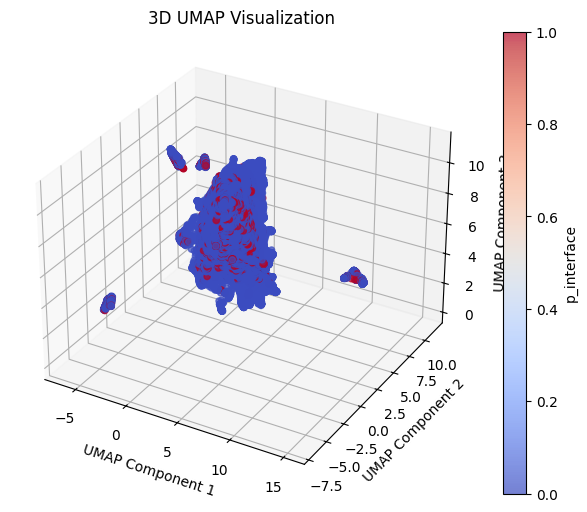

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Assume X_pca is your PCA-transformed data (or X_scaled if skipping PCA)
umap_3d = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_pca)

# Plot the 3D UMAP embedding
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2],
                     c=y, cmap='coolwarm', alpha=0.7)
fig.colorbar(scatter, label='p_interface')
ax.set_title("3D UMAP Visualization")
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
plt.show()